# Machine Learning - Ensemble Models
- 여러 예측 모델을 연결하여 더 강력한 모델을 만드는 것
- 편향, 잡음 및 분산으로 인한 오류를 막고, Overfitting 방지

In [1]:
import warnings, platform
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package Load

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, auc

## Bagging
- Bootstrap aggregating
- 크기가 같은 표본을 단순 임의 복원추출하여 여러 개의 모델을 만듦
- Bootstraping -> Modeling -> Voting
- 분산이 적은 모델을 만드는 것이 목표이고, 각 과정은 병렬로 이루어짐
- Pasting: Bagging과 동일 과정을 거치나, 비복원추출 진행하는 것이 다른 점. 성능이 떨어져서 잘 사용하지 않음

### (1) Classifier

In [5]:
breast = pd.read_csv('./ADP_book_ver01/data/breast-cancer.csv')

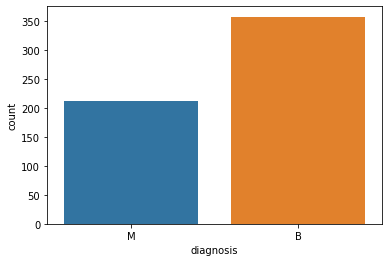

In [6]:
sns.countplot(x='diagnosis', data=breast)
plt.show()

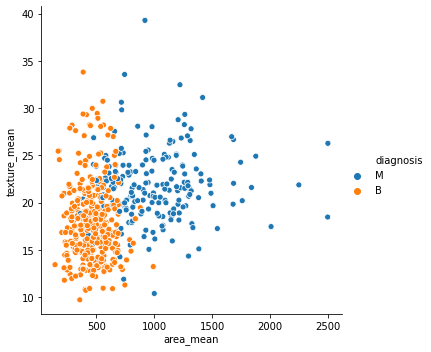

In [7]:
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)
plt.show()

In [8]:
breast["diagnosis"] = np.where(breast["diagnosis"]=="M", 1, 0) # target 변수 처리
features = ["area_mean", "area_worst"]

x = breast[features]
y = breast["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [10]:
### Modeling
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", clf.score(x_test, pred))

Accuracy Score :  1.0


In [11]:
pd.DataFrame(confusion_matrix(y_test, pred), index=['True[0]', 'True[1]'], columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],102,5
True[1],8,56


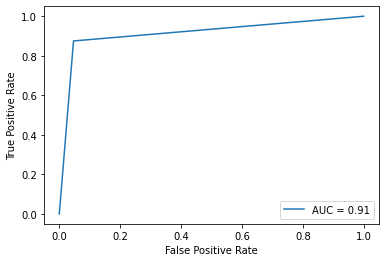

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve(clf, x_test, y_test)
display.plot()
plt.show()

In [13]:
### oob_score
# Out of bag
# Bootstrap 시 선택되지 않은 데이터로 평가한 결과
clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
oob = clf_oob.fit(x, y).oob_score_
print(oob)

0.9050966608084359


### (2) Regressor

In [14]:
car = pd.read_csv('./ADP_book_ver01/data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']
print(x.shape, y.shape)

(205, 13) (205,)


In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [17]:
reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(x, y)
reg.oob_score_

0.8814340054866906

## Boosting
- Bootstrap 샘플링 과정에서, 분류가 잘못된 데이터의 가중치를 높임
- 예측력이 약한 모델을 결합에 강한 예측모형을 만드는 것
- Overfitting 위험 있음

### (1) AdaBoost

#### Classifier

In [18]:
features = ["area_mean", "texture_mean"]

x = breast[features]
y = breast["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
clf = AdaBoostClassifier(base_estimator=None)
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.9122807017543859


In [21]:
pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc * 100, 2)))
print('정밀도\t{}%'.format(round(test_prc * 100, 2)))
print('재현율\t{}%'.format(round(test_rcll * 100, 2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[102   5]
 [ 10  54]]
정확도	91.23%
정밀도	91.53%
재현율	84.38%
F1	87.8%


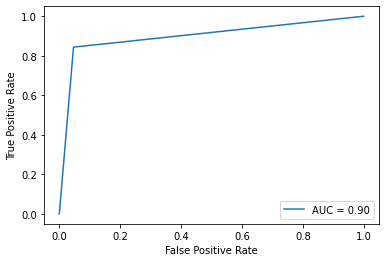

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve(clf, x_test, y_test)
display.plot()
plt.show()

In [23]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


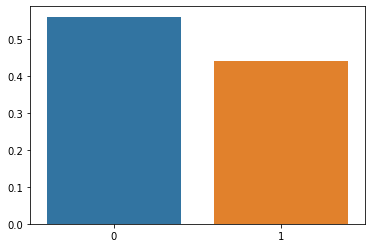

In [24]:
xtick_label_position = list(range(len(features)))
plt.xticks(xtick_label_position, features)
sns.barplot([x for x in range(len(importances))], importances)
plt.show()

#### Regressor

In [25]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))

x = car_num[features]
y = car_num['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [26]:
from sklearn.ensemble import AdaBoostRegressor

In [27]:
reg = AdaBoostRegressor(base_estimator=None)
pred = reg.fit(x_train, y_train).predict(x_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	5347389.738
MAE	1758.745
RMSE	2312.442
ACC	91.142%


In [28]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.014660
1          carheight     0.005146
2          carlength     0.005406
3           carwidth     0.043346
4            citympg     0.007008
5   compressionratio     0.005040
6         curbweight     0.053718
7         enginesize     0.646814
8         highwaympg     0.050160
9         horsepower     0.116856
10           peakrpm     0.009276
11            stroke     0.007037
12         wheelbase     0.035533


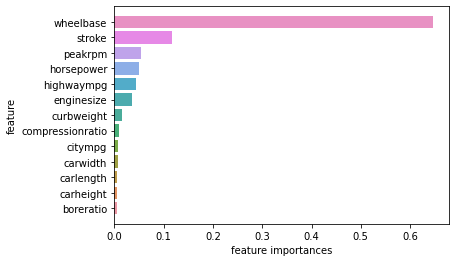

In [29]:
n_features = x_train.shape[1]
importances = pd.Series(reg.feature_importances_, index=x_train.columns).sort_values()

sns.barplot(x=importances, y=features)
plt.yticks(np.arange(n_features), features)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

### (2) Gradient Boosting
- Gradient descent를 이용하여 오류 데이터 가중치 업데이트
- 트리 기반 모델 사용

#### Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
### human dataset
# 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
# 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
feature_dup_df = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
new_feature_name_df = pd.merge(feature_name_df.reset_index(), feature_dup_df, how='outer')
new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    
# DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
x_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
x_test = pd.read_csv('./data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    

In [32]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9386


In [33]:
### GridSearchCV로 GBM의 하이퍼 파라미터 튜닝을 수행하는 예제 입니다. 
### 사이킷런이 1.X로 업그레이드 되며서 GBM의 학습 속도가 현저하게 저하되는 문제가 오히려 발생합니다. 
### 수행 시간이 오래 걸리므로 참고용으로만 사용하시면 좋을 것 같습니다. 
# params = {
#     'n_estimators': [100, 500],
#     'learning_rate': [0.05, 0.1]
# }
# grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2 ,verbose=1)
# grid_cv.fit(x_train , y_train)
# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [34]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
# gb_pred = grid_cv.best_estimator_.predict(x_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)
# print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

#### Regressor

In [35]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=42)

gbrt.fit(x, y)
gbrt_slow.fit(x, y)

GradientBoostingRegressor(max_depth=2, random_state=42)

In [38]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

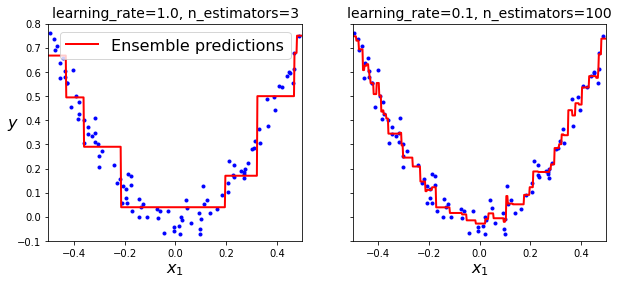

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], x, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.show()

### (3) XGBoost
- eXtra Gradient Boost

#### Classifier

In [40]:
from sklearn.datasets import load_breast_cancer

In [41]:
dataset = load_breast_cancer()
x_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=x_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [42]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [43]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
x_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
x_train, x_test, y_train, y_test=train_test_split(x_features, y_label, test_size=0.2, random_state=156)

In [44]:
# !pip install xgboost
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

In [45]:
xgb_wrapper = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

In [46]:
confusion = confusion_matrix(y_test, w_preds)
accuracy = accuracy_score(y_test, w_preds)
precision = precision_score(y_test, w_preds)
recall = recall_score(y_test, w_preds)
f1 = f1_score(y_test, w_preds)
auc_score = roc_auc_score(y_test, w_pred_proba)
    
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{3:.4f}'.format(accuracy, precision, recall, f1, auc_score))

오차 행렬
 [[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1:0.9677, AUC:0.9677


In [47]:
xgb_wrapper = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3)
evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(x_test)
ws100_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


In [48]:
confusion = confusion_matrix(y_test, ws100_preds)
accuracy = accuracy_score(y_test, ws100_preds)
precision = precision_score(y_test, ws100_preds)
recall = recall_score(y_test, ws100_preds)
f1 = f1_score(y_test, ws100_preds)
auc_score = roc_auc_score(y_test, ws100_pred_proba)
    
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{3:.4f}'.format(accuracy, precision, recall, f1, auc_score))

오차 행렬
 [[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1:0.9677, AUC:0.9677


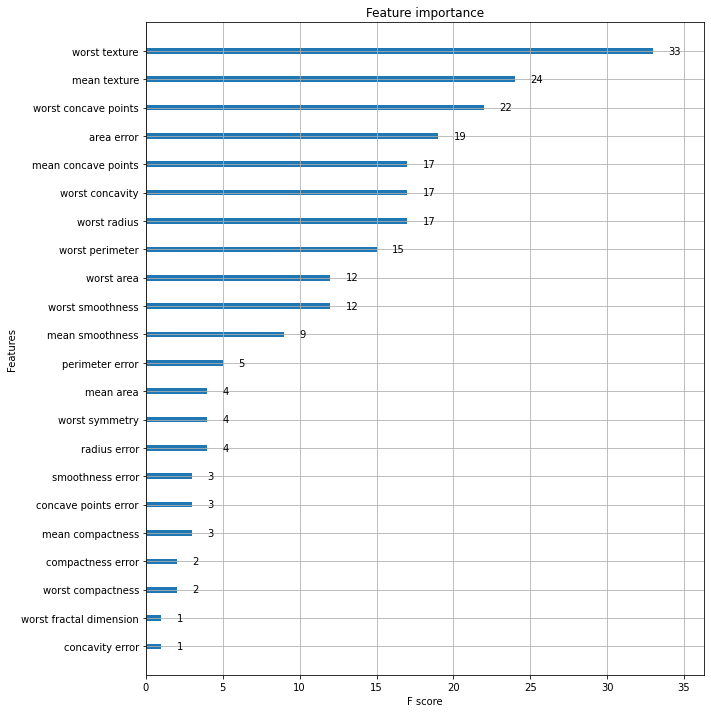

In [49]:
fig, ax = plt.subplots(figsize=(10, 12)) 
plot_importance(xgb_wrapper, ax=ax)

In [50]:
# !pip install hyperopt
from hyperopt import hp
from hyperopt import STATUS_OK
from hyperopt import fmin, tpe, Trials

In [51]:
### Bayesian optimization
# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)}

In [52]:
# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, x_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}


In [53]:
trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.RandomState(9)) # random number generator
print('best:', best)

100%|██████████| 50/50 [00:03<00:00, 13.84it/s, best loss: -0.9670762170326479]
best: {'colsample_bytree': 0.5811103711796605, 'learning_rate': 0.15180675941399624, 'max_depth': 8.0, 'min_child_weight': 1.0}


In [54]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.58111, learning_rate:0.15181, max_depth:8, min_child_weight:1


In [55]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5))

evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

pred = xgb_wrapper.predict(x_test)
pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_auc = roc_auc_score(y_test, pred_proba)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc * 100, 2)))
print('정밀도\t{}%'.format(round(test_prc * 100, 2)))
print('재현율\t{}%'.format(round(test_rcll * 100, 2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))
print('AUC\t{}%'.format(round(test_auc * 100, 2)))

[0]	validation_0-logloss:0.578221
Will train until validation_0-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.492012
[2]	validation_0-logloss:0.420106
[3]	validation_0-logloss:0.369392
[4]	validation_0-logloss:0.327529
[5]	validation_0-logloss:0.293799
[6]	validation_0-logloss:0.262687
[7]	validation_0-logloss:0.243564
[8]	validation_0-logloss:0.221154
[9]	validation_0-logloss:0.204395
[10]	validation_0-logloss:0.19117
[11]	validation_0-logloss:0.180603
[12]	validation_0-logloss:0.168258
[13]	validation_0-logloss:0.160961
[14]	validation_0-logloss:0.153644
[15]	validation_0-logloss:0.144174
[16]	validation_0-logloss:0.140235
[17]	validation_0-logloss:0.136454
[18]	validation_0-logloss:0.133027
[19]	validation_0-logloss:0.129182
[20]	validation_0-logloss:0.123826
[21]	validation_0-logloss:0.121787
[22]	validation_0-logloss:0.121513
[23]	validation_0-logloss:0.116898
[24]	validation_0-logloss:0.115334
[25]	validation_0-logloss:0.11054
[26]	validation_0-logloss:0.106849

#### Regressor

In [56]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3 * x[:, 0]**2 + 0.05 * np.random.randn(100)

x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=49)

In [57]:
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)
y_pred = xgb_reg.predict(x_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

[22:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MSE: 0.0028512559726563943


In [58]:
xgb_reg.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=2) # early stopping
y_pred = xgb_reg.predict(x_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

[22:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.286719
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.258221
[2]	validation_0-rmse:0.232634
[3]	validation_0-rmse:0.210526
[4]	validation_0-rmse:0.190232
[5]	validation_0-rmse:0.172196
[6]	validation_0-rmse:0.156394
[7]	validation_0-rmse:0.142241
[8]	validation_0-rmse:0.129789
[9]	validation_0-rmse:0.118752
[10]	validation_0-rmse:0.108388
[11]	validation_0-rmse:0.100155
[12]	validation_0-rmse:0.09208
[13]	validation_0-rmse:0.084791
[14]	validation_0-rmse:0.078699
[15]	validation_0-rmse:0.073248
[16]	validation_0-rmse:0.069391
[17]	validation_0-rmse:0.066277
[18]	validation_0-rmse:0.063458
[19]	validation_0-rmse:0.060326
[20]	validation_0-rmse:0.0578
[21]	validation_0-rmse:0.055643
[22]	validation_0-rmse:0.053943
[23]	validation_0-rmse:0.053138
[24]	validation_0-rmse:0.052415
[25]	validation_0-rmse:0.051821
[

### (4) LightGBM
- XGBoost보다 더 빠른 학습 속도
- Leaf Wise tree 분할: 비균형 트리 생성
- Regressor에서 quantile 옵션 적용 가능 (objective = 'quantile', alpha = quantile)

In [59]:
# !pip install lightgbm
from lightgbm import plot_importance
from lightgbm import early_stopping
from lightgbm import LGBMClassifier

In [60]:
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
x_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=156)
x_tr, x_val, y_tr, y_val= train_test_split(x_train, y_train, test_size=0.1, random_state=156)

In [61]:
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=40, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(x_tr, y_tr), (x_val, y_val)]
                   
lgbm_wrapper.fit(x_tr, y_tr, eval_metric="logloss", eval_set=evals, callbacks=[early_stopping(stopping_rounds=10)])

[1]	training's binary_logloss: 0.625671	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 10 rounds.
[2]	training's binary_logloss: 0.588173	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	training's binary_loglos

LGBMClassifier(learning_rate=0.05, n_estimators=40)

In [62]:
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:, 1]

confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc_score = roc_auc_score(y_test, pred_proba)
    
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{3:.4f}'.format(accuracy, precision, recall, f1, auc_score))

오차 행렬
 [[34  3]
 [ 3 74]]
정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610, F1:0.9610, AUC:0.9610


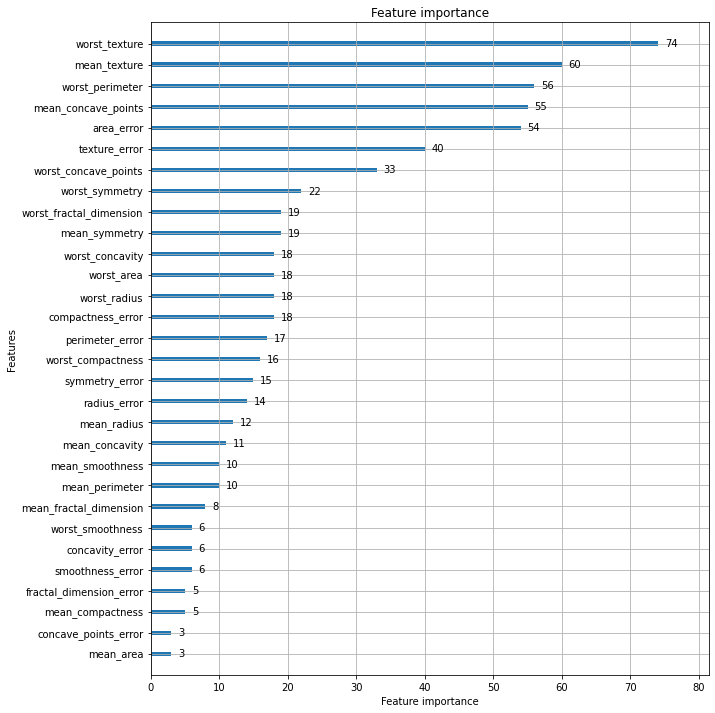

In [63]:
# plot_importance()를 이용하여 feature 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## RandomForest
- Bagging에 랜덤 과정을 추가한 트리 기반 모델
- 예측변수들을 임의로 추출하여 Bootstrap 샘플 구성
- input 변수가 많을수록 좋은 성능

### (1) Classifier

In [64]:
features = ["area_mean", "texture_mean"]

x = breast[features]
y = breast["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)

pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도: ", clf.score(x_test, y_test))

정확도:  0.8947368421052632


In [67]:
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[102   5]
 [ 13  51]]
정확도	89.47%
정밀도	91.07%
재현율	79.69%
F1	85.0%


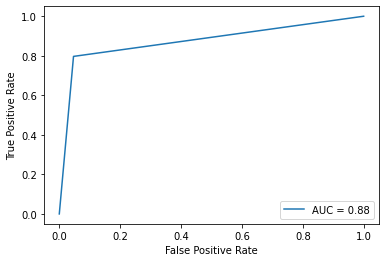

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve(clf, x_test, y_test)
display.plot()
plt.show()

In [69]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(["area_mean", "texture_mean"])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean     0.709755
1  texture_mean     0.290245


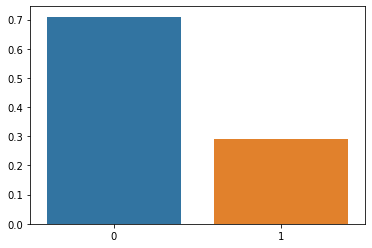

In [70]:
xtick_label_position = list(range(len(features)))
plt.xticks(xtick_label_position, features)
sns.barplot([x for x in range(len(importances))], importances)

In [71]:
### stageC data
stagec = pd.read_csv('./data/stagec.csv')
stagec.dropna(inplace=True)
stagec.head()

,pgtime,pgstat,age,eet,g2,grade,gleason,ploidy
0,6.1,0,64,2.0,10.26,2,4.0,diploid
2,5.2,1,59,2.0,9.99,3,7.0,diploid
3,3.2,1,62,2.0,3.57,2,4.0,diploid
4,1.9,1,64,2.0,22.56,4,8.0,tetraploid
5,4.8,0,69,1.0,6.14,3,7.0,diploid


In [72]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(stagec.drop('ploidy', axis=1), stagec['ploidy'], test_size=0.2, random_state=0, stratify=stagec['ploidy'])

In [73]:
rand_clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
rand_clf.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5)

In [74]:
pred = rand_clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc *100,2)))

[[ 0  1  0]
 [ 0 13  0]
 [ 0  0 13]]
정확도	96.3%


In [75]:
importances = rand_clf.feature_importances_
feature_names = stagec.columns.difference(['ploidy'])
std = np.std([tree.feature_importances_ for tree in rand_clf.estimators_], axis=0)

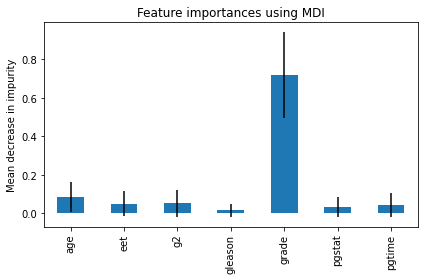

In [76]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### (2) Regressor

In [77]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
reg = RandomForestRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	4378315.47
MAE	1354.77
RMSE	2092.442
ACC	92.748%


In [80]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.005289
1          carheight     0.003879
2          carlength     0.005723
3           carwidth     0.025051
4            citympg     0.006962
5   compressionratio     0.002880
6         curbweight     0.197532
7         enginesize     0.650507
8         highwaympg     0.053402
9         horsepower     0.023727
10           peakrpm     0.006921
11            stroke     0.003953
12         wheelbase     0.014174


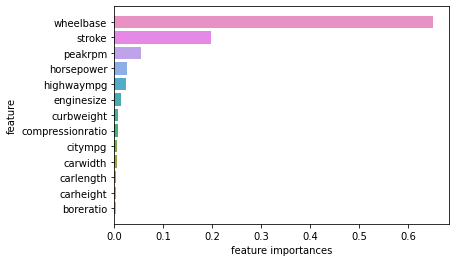

In [81]:
n_features = x_train.shape[1]
importances = pd.Series(reg.feature_importances_, index=x_train.columns).sort_values()
column_nm = features

sns.barplot(x=importances, y=column_nm)
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

## Voting
- 여러 모델의 결과를 가지고 투표를 통해 최종 output 생서
- Voting의 결과물이 반드시 좋은 것은 아님

### (1) Classifier
- Hard voting: 다수결 원칙. 모델의 가중치를 조정하기 용이
- Soft voting: 각 Class의 확률을 평균하여 결정
    - 확률이 높은 투표에 조금 더 비중이 있음
    - 성능이 대체적으로 더 좋은 편

In [82]:
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [83]:
### Breast cancer data
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [84]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

In [85]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42, probability=True)

In [86]:
### hard voting
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('knn', knn_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(x_train, y_train)

for clf in (lr_clf, knn_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9473684210526315
KNeighborsClassifier 0.9385964912280702
RandomForestClassifier 0.9473684210526315
SVC 0.9298245614035088
VotingClassifier 0.956140350877193


In [87]:
### soft voting
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('knn', knn_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(x_train, y_train)

for clf in (lr_clf, knn_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9473684210526315
KNeighborsClassifier 0.9385964912280702
RandomForestClassifier 0.9473684210526315
SVC 0.9298245614035088
VotingClassifier 0.9473684210526315


### (2) Regressor

In [88]:
bike_df = pd.read_csv('./data/bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [89]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [90]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

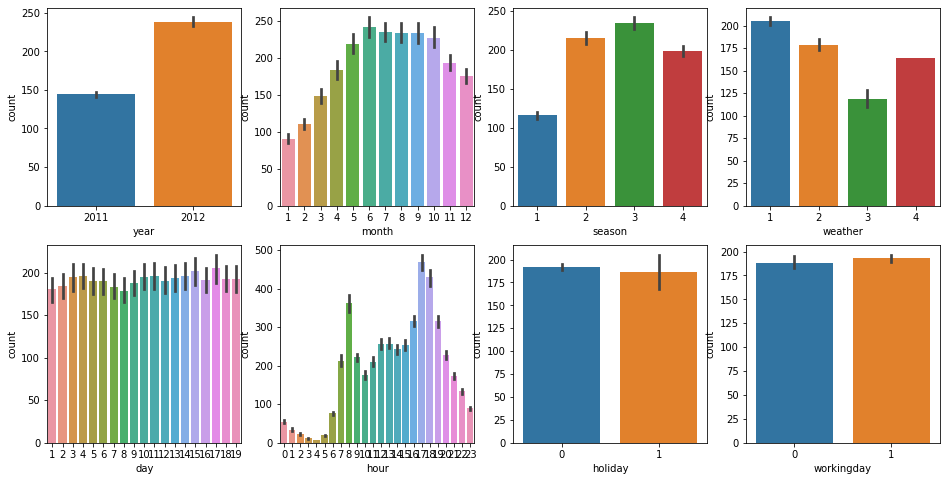

In [91]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [92]:
x = bike_df.drop(['count'], axis=1, inplace=False)
y = bike_df['count']

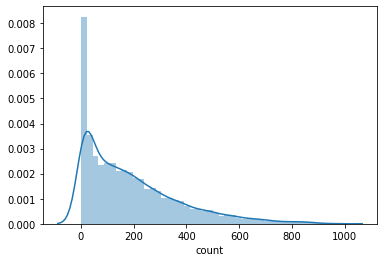

In [93]:
sns.distplot(y)

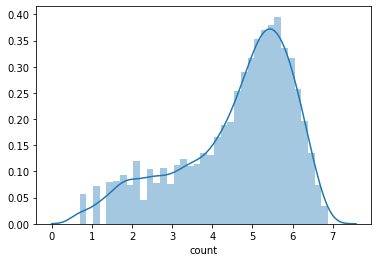

In [94]:
# Log transformation of y
y_log_transform = np.log1p(y)
sns.distplot(y_log_transform)

In [95]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
x_ohe = pd.get_dummies(x, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [96]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_log = np.log1p(y)

# 원-핫 인코딩이 적용된 feature 데이터 세트와 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
x_train, x_test, y_train, y_test = train_test_split(x_ohe, y_log, test_size=0.3, random_state=0)

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [98]:
# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    
    return rmsle

In [99]:
# 개별 모델 성능 평가
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

rf_reg = RandomForestRegressor(n_estimators=50)
gbm_reg = GradientBoostingRegressor(n_estimators=50)
xgb_reg = XGBRegressor(n_estimators=50)
lgbm_reg = LGBMRegressor(n_estimators=50)

y_test = np.expm1(y_test)

# XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
for model in [lr_reg, ridge_reg, lasso_reg, rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    model.fit(x_train.values, y_train.values)
    pred = model.predict(x_test.values)

    pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    
    rmsle_val = rmsle(y_test, pred)
    rmse_val = mean_squared_error(y_test, pred, squared=True)
    mae_val = mean_absolute_error(y_test, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

### LinearRegression ###
RMSLE: 0.590, RMSE: 9543.050, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 9707.883, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 12818.499, MAE: 72.803
### RandomForestRegressor ###
RMSLE: 0.361, RMSE: 2575.515, MAE: 31.513
### GradientBoostingRegressor ###
RMSLE: 0.621, RMSE: 16048.815, MAE: 78.591
[22:31:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.621, RMSE: 16796.702, MAE: 80.051
### LGBMRegressor ###
RMSLE: 0.371, RMSE: 4182.161, MAE: 40.203


In [100]:
# 개별 모델 Voting
vo_reg = VotingRegressor(estimators=[('LR', lr_reg), ('Ridge', ridge_reg), ('Lasso', lasso_reg), ('RF', rf_reg), ('GBM', gbm_reg), ('XGB', xgb_reg), ('LGBM', lgbm_reg)])

vo_reg.fit(x_train, y_train)
pred = vo_reg.predict(x_test)
pred = np.expm1(pred)

rmsle_val = rmsle(y_test, pred)
rmse_val = mean_squared_error(y_test, pred, squared=False)
mae_val = mean_absolute_error(y_test, pred)
print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

[22:31:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE: 0.490, RMSE: 92.207, MAE: 57.535


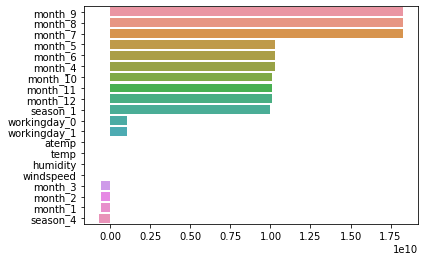

In [101]:
# Linear Regression coef 파악
coef = pd.Series(lr_reg.coef_, index=x_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [102]:
# DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
result_df = pd.DataFrame(y_test.values, columns=['real_count'])
result_df['predicted_count']= np.round(pred)
result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
# 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
print(result_df.sort_values('diff', ascending=False)[:5])

      real_count  predicted_count   diff
2817       856.0            374.0  482.0
1181       891.0            422.0  469.0
370        686.0            267.0  419.0
3115       651.0            236.0  415.0
1095       743.0            331.0  412.0


## Stacking
- Stacked generalization
- 여러 모델의 예측을 취합하는 새로운 모델(Blender, Meta learner) 훈련
- 수행 시간 대비 성능이 좋은 편은 아님

### (1) Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [104]:
cancer_data = load_breast_cancer()
x_data = cancer_data.data
y_label = cancer_data.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=0)

In [105]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [106]:
# 개별 모델들을 학습. 
knn_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
dt_clf.fit(x_train, y_train)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [107]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
dt_pred = dt_clf.predict(x_test)
ada_pred = ada_clf.predict(x_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [108]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [109]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


In [110]:
### CV set stacking
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds=5):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [111]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, x_train, y_train, x_test)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, x_train, y_train, x_test)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, x_train, y_train, x_test)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, x_train, y_train, x_test)

KNeighborsClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
RandomForestClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
DecisionTreeClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
AdaBoostClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작


In [112]:
stack_final_x_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
stack_final_x_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', x_train.shape, '원본 테스트 피처 Shape:', x_test.shape)
print('스태킹 학습 피처 데이터 Shape:', stack_final_x_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', stack_final_x_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [113]:
lr_final.fit(stack_final_x_train, y_train)
stack_final = lr_final.predict(stack_final_x_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


### (2) Regressor

In [114]:
house_df_org = pd.read_csv('./data/house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [115]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


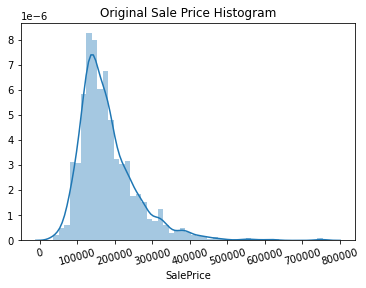

In [116]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.distplot(house_df['SalePrice'], kde=True)
plt.show()

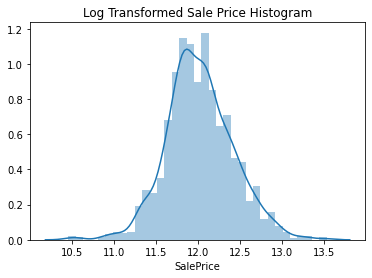

In [117]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice, kde=True)
plt.show()

In [118]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [119]:
from scipy.stats import skew

In [120]:
# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew()호출
skew_features = house_df[features_index].apply(lambda x : skew(x))

# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [121]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [122]:
# One-hot encoding
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


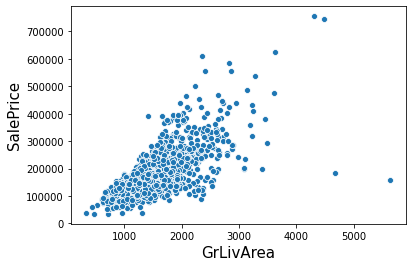

In [123]:
# Outlier 확인
sns.scatterplot(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [124]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 271)


In [125]:
y = house_df_ohe['SalePrice']
x = house_df_ohe.drop('SalePrice', axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156)

In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [127]:
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10]}

grid_model = GridSearchCV(ridge_reg, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(x, y)
rmse = np.sqrt(-1 * grid_model.best_score_)
print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
best_ridge = grid_model.best_estimator_

grid_model = GridSearchCV(lasso_reg, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(x, y)
rmse = np.sqrt(-1 * grid_model.best_score_)
print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
best_lasso = grid_model.best_estimator_

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


In [128]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
for model in models:
    # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
    rmse_list = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5))
    rmse_avg = np.mean(rmse_list)
    print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
    print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))


LinearRegression CV RMSE 값 리스트: [0.115 0.128 0.142 0.113 0.118]
LinearRegression CV 평균 RMSE 값: 0.123

Ridge CV RMSE 값 리스트: [0.103 0.119 0.122 0.105 0.114]
Ridge CV 평균 RMSE 값: 0.112

Lasso CV RMSE 값 리스트: [0.131 0.144 0.146 0.139 0.142]
Lasso CV 평균 RMSE 값: 0.141


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


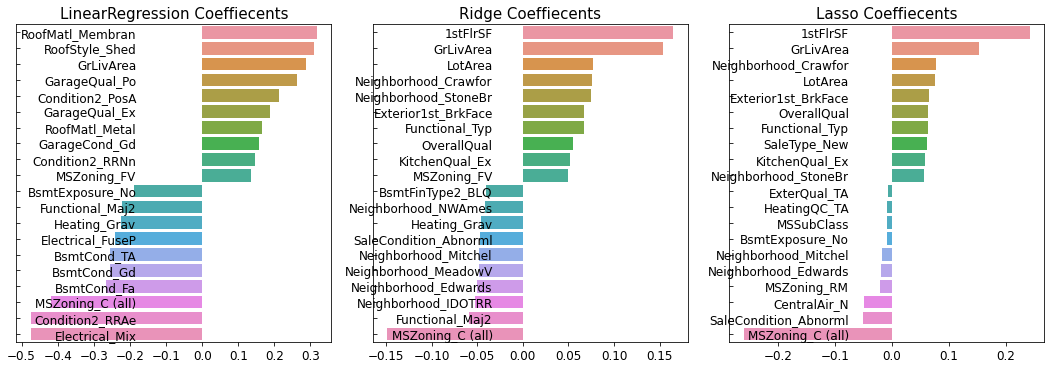

In [129]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]

rmses = []
for model in models:
    pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, pred, squared=False)

    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    rmses.append(rmse)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]

# 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
fig.tight_layout() 
# 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
for i_num, model in enumerate(models): 
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=x.columns)

    # 상위 10개, 하위 10개 coefficient 추출
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
        
    coef_concat = pd.concat( [coef_high , coef_low] )
    # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
    axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=15)
    axs[i_num].tick_params(axis="y",direction="in", pad=-120)
    for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
        label.set_fontsize(12)
    sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

In [130]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [131]:
xgb_params = {'n_estimators':[100]}
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
grid_model = GridSearchCV(xgb_reg, param_grid=xgb_params, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(x, y)
rmse = np.sqrt(-1 * grid_model.best_score_)
print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
best_xgb = grid_model.best_estimator_

lgbm_params = {'n_estimators':[100]}
lgbm_reg = LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
grid_model = GridSearchCV(lgbm_reg, param_grid=lgbm_params, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(x, y)
rmse = np.sqrt(-1 * grid_model.best_score_)
print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
best_lgbm = grid_model.best_estimator_

[22:31:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1549, 최적 alpha:{'n_estimators': 100}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1435, 최적 alpha:{'n_estimators': 100}


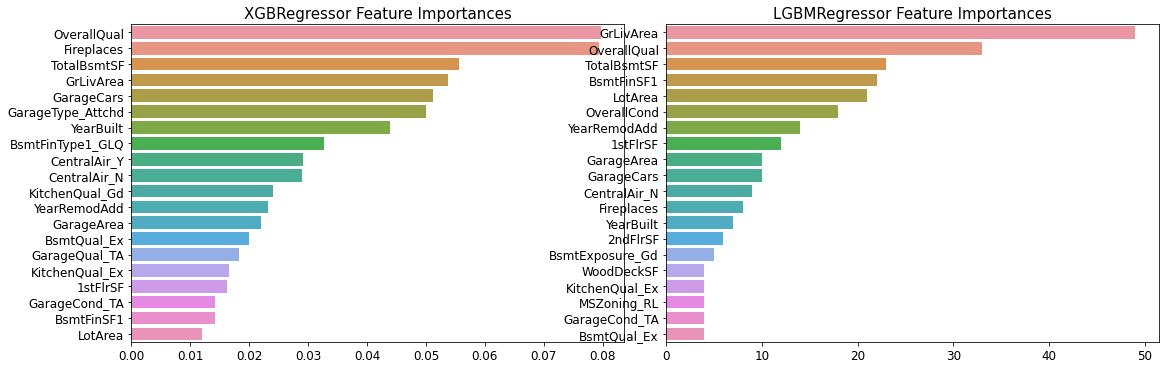

In [132]:
# 앞 예제에서 print_best_params()가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
fig.tight_layout() 

# 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
for i_num, model in enumerate(models):
    # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=x.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    
    axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=15)
    #font 크기 조정.
    for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
        label.set_fontsize(12)
    sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

In [133]:
# 개별 모델의 학습
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(x_train, y_train)
lgbm_reg.fit(x_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(x_test)
lasso_pred = lasso_reg.predict(x_test)
xgb_pred = xgb_reg.predict(x_test)
lgbm_pred = lgbm_reg.predict(x_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.2 * ridge_pred + 0.2 * lasso_pred + 0.3 * xgb_pred + 0.3 * lgbm_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred,
         'XGB': xgb_pred,
         'LGBM': lgbm_pred}

#최종 혼합 모델, 개별모델의 RMSE 값 출력
for key in preds.keys():
    print('{0} 모델의 RMSE: {1}'.format(key, mean_squared_error(y_test , preds[key], squared=False)))

[22:31:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.1073276717923129
Ridge 모델의 RMSE: 0.1031341660786951
Lasso 모델의 RMSE: 0.10024170460890042
XGB 모델의 RMSE: 0.1442743418614722
LGBM 모델의 RMSE: 0.12220346943199471


In [134]:
# get_stacking_base_datasets()은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
x_train_n = x_train.values
x_test_n = x_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, x_train_n, y_train_n, x_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, x_train_n, y_train_n, x_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, x_train_n, y_train_n, x_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, x_train_n, y_train_n, x_test_n, 5)

Ridge  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
Lasso  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
XGBRegressor  model 시작
	 폴드 세트:  0  시작
[22:31:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작
[22:31:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작
[22:31:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작
[22:31:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작
[22:31:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작


In [135]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
stack_final_x_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
stack_final_x_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(stack_final_x_train, y_train)
print('스태킹 회귀 모델의 최종 RMSE 값은:', mean_squared_error(y_test, meta_model_lasso.predict(stack_final_x_test), squared=False))

스태킹 회귀 모델의 최종 RMSE 값은: 0.09924465721235685
